#**THEORY :**

#Q1. What is K-Nearest Neighbors (KNN) and how does it work?

##ANS: K-Nearest Neighbors (KNN) is a simple, non-parametric supervised learning algorithm used for classification and regression. It works by finding the "K" nearest data points to a given input based on a distance metric (e.g., Euclidean distance) and making predictions based on the majority class (for classification) or averaging the values (for regression).

#Q2. What is the difference between KNN Classification and KNN Regression?

##ANS:

*   ***KNN Classification:*** Assigns a class label based on the majority vote among the K nearest neighbors.

*   ***KNN Regression:*** Predicts a continuous value by averaging the values of the K nearest neighbors.



#Q3. What is the role of the distance metric in KNN?

##ANS: The distance metric determines how "closeness" is measured. Common distance metrics include Euclidean, Manhattan, and Minkowski distances. The choice of metric can significantly affect the performance of the model.

#Q4. What is the Curse of Dimensionality in KNN?

##ANS: As the number of dimensions increases, data points become more sparse, making distance measurements less meaningful. This reduces the effectiveness of KNN, as all points appear equidistant, making classification unreliable.

#Q5. How can we choose the best value of K in KNN?

##ANS: The optimal value of K is determined using techniques like cross-validation. A small K makes the model sensitive to noise, while a large K smooths decision boundaries but may reduce accuracy.

#Q6. What are KD Tree and Ball Tree in KNN?

##ANS: These are data structures used to optimize the search for nearest neighbors:

*  ***KD Tree:*** Works well in lower dimensions and partitions space using hyperplanes.
*  ***Ball Tree:*** Works better in higher dimensions by partitioning space into nested hyperspheres.







#Q7. When should you use KD Tree vs. Ball Tree?

##ANS:

*  Use ***KD Tree*** when the dataset has low-dimensional data (typically less than 20 dimensions).
*   Use ***Ball Tree*** when dealing with high-dimensional data, as it scales better.



#Q8. What are the disadvantages of KNN?

##ANS:

*   Computationally expensive for large datasets.

*  Sensitive to irrelevant features and noise.

*  Struggles with high-dimensional data due to the Curse of Dimensionality.







#Q9. How does feature scaling affect KNN?

##ANS: KNN relies on distance measurements, so features with larger ranges dominate. Feature scaling (e.g., Min-Max Scaling or Standardization) ensures all features contribute equally.



#Q10.What is PCA (Principal Component Analysis)?

##ANS: PCA is a dimensionality reduction technique that transforms correlated features into a smaller set of uncorrelated principal components while retaining as much variance as possible.

#Q11. How does PCA work?

##ANS:

*   Standardize the dataset.

*  Compute the covariance matrix.

*  Find the eigenvalues and eigenvectors.

*   Sort eigenvectors by decreasing eigenvalues.

*  Project data onto the top principal components.




#Q12. What is the geometric intuition behind PCA?

##ANS: PCA finds new axes (principal components) that capture the most variance in the data. It rotates the data to align with these new axes, reducing redundancy.

#Q13. What is the difference between Feature Selection and Feature Extraction?

##ANS:

*  ***Feature Selection:*** Chooses a subset of existing features.


*  ***Feature Extraction:*** Transforms existing features into new ones (e.g., PCA).



#Q14.What are Eigenvalues and Eigenvectors in PCA?

##ANS:

* ***Eigenvectors*** represent the directions of principal components.

*  ***Eigenvalues*** measure the variance captured by each principal component.



#Q15. How do you decide the number of components to keep in PCA?

##ANS: The number of components is chosen based on the explained variance ratio. A common approach is to keep enough components to retain ~95% variance.

#Q16. Can PCA be used for classification?

##ANS: PCA itself does not classify data, but it helps improve classification by reducing dimensions, making algorithms like KNN or SVM more efficient.

#Q17. What are the limitations of PCA?

##ANS:

*  Loses interpretability of original features.

*  Assumes linear relationships.
*  Sensitive to outliers.



#Q18. How do KNN and PCA complement each other?

##ANS: PCA helps KNN by reducing dimensions and eliminating redundant features, making distance calculations more meaningful and efficient.

#Q19. How does KNN handle missing values in a dataset?

##ANS: KNN can impute missing values by averaging (for numerical data) or taking the majority vote (for categorical data) from the nearest neighbors.

#Q20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

##ANS:

*   PCA is unsupervised, maximizing variance.

*   LDA is supervised, maximizing class separability.





##PRACTICAL:



##Q21: Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


##Q22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic data
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.0428972927058995


##Q23: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Euclidean Accuracy: {accuracy_euclidean}")
print(f"Manhattan Accuracy: {accuracy_manhattan}")


Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


##Q24: Train a KNN Classifier with different values of K and visualize decision boundaries.

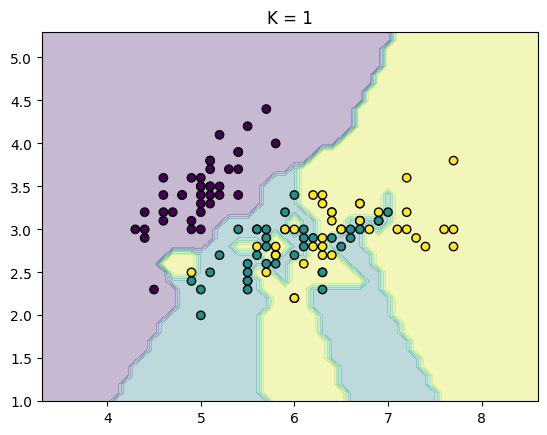

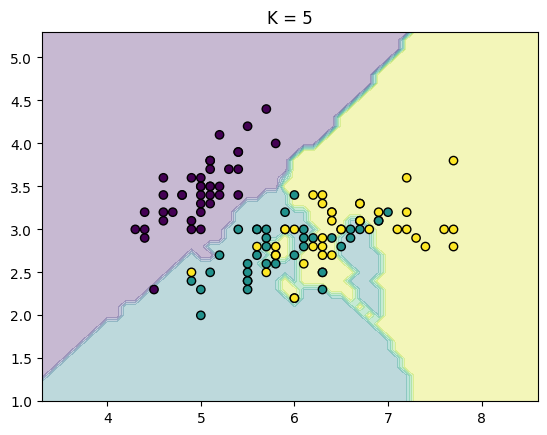

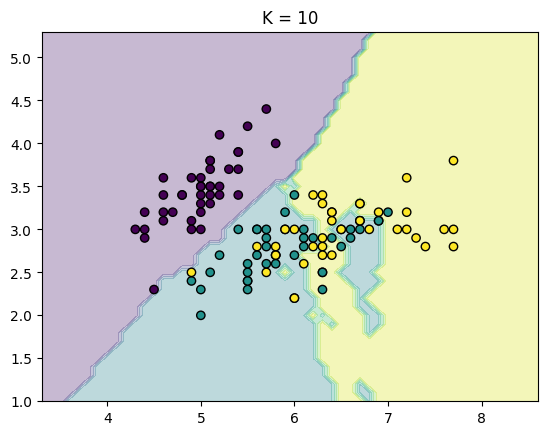

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Generate synthetic data
X, y = X_train[:, :2], y_train  # Use first two features for visualization

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Train and plot for different K values
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_decision_boundary(knn, X, y, f"K = {k}")


##Q25: Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy_unscaled = accuracy_score(y_test, knn.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, knn.predict(X_test_scaled))

print(f"Accuracy without scaling: {accuracy_unscaled}")
print(f"Accuracy with scaling: {accuracy_scaled}")


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


##Q26: Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [6]:
from sklearn.decomposition import PCA

# Create synthetic data
X_synthetic = np.random.rand(100, 5)

# Train PCA
pca = PCA()
pca.fit(X_synthetic)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.27275921 0.22359292 0.18653592 0.18071794 0.13639402]


##Q27: Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [7]:
# Without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, knn.predict(X_test_scaled))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn.fit(X_train_pca, y_train)
acc_with_pca = accuracy_score(y_test, knn.predict(X_test_pca))

print(f"Accuracy without PCA: {acc_no_pca}")
print(f"Accuracy with PCA: {acc_with_pca}")


Accuracy without PCA: 1.0
Accuracy with PCA: 0.9333333333333333


##Q28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.9583333333333334


##Q29: Train a KNN Classifier and check the number of misclassified samples.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

misclassified = (y_test != y_pred).sum()
print("Number of Misclassified Samples:", misclassified)


Number of Misclassified Samples: 0


##Q30: Train a PCA model and visualize the cumulative explained variance.

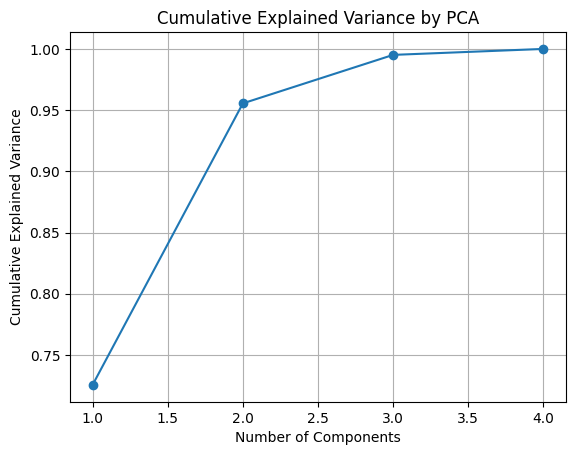

In [10]:
import matplotlib.pyplot as plt

pca = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()


##Q31: Train a KNN Classifier using different values of the **weights** parameter (**uniform** vs. **distance**) and compare accuracy.


In [11]:
# Uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test_scaled))

# Distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test_scaled))

print(f"Accuracy with uniform weights: {acc_uniform}")
print(f"Accuracy with distance weights: {acc_distance}")


Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


##Q32: Train a KNN Regressor and analyze the effect of different K values on performance.

In [12]:
for k in [1, 3, 5, 7, 9]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"K={k}, MSE={mse}")


K=1, MSE=0.0
K=3, MSE=0.007407407407407404
K=5, MSE=0.007999999999999997
K=7, MSE=0.016326530612244896
K=9, MSE=0.015226337448559672


##Q33: Implement KNN Imputation for handling missing values in a dataset.

In [13]:
from sklearn.impute import KNNImputer

# Create data with missing values
X_missing = X.copy()
X_missing[0:10, 0] = np.nan  # introduce missing values

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)

print("Imputation completed. First row after imputation:", X_imputed[0])


Imputation completed. First row after imputation: [5.7 3.6]


##Q34: Train a PCA model and visualize the data projection onto the first two principal components.

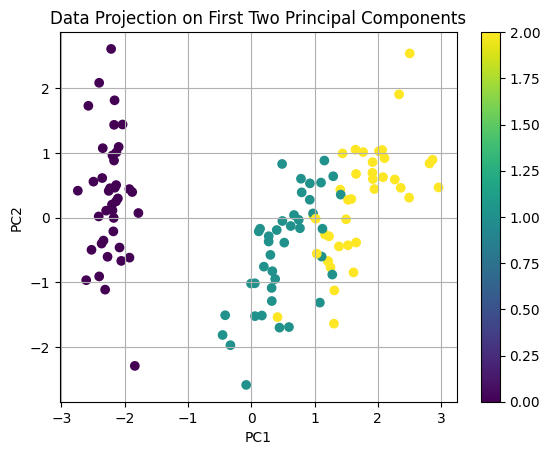

In [14]:
pca = PCA(n_components=2)
X_pca_proj = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca_proj[:, 0], X_pca_proj[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Projection on First Two Principal Components')
plt.colorbar()
plt.grid(True)
plt.show()


##Q35: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [15]:
# KD Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train_scaled, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test_scaled))

# Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train_scaled, y_train)
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test_scaled))

print(f"Accuracy using KD Tree: {acc_kd}")
print(f"Accuracy using Ball Tree: {acc_ball}")


Accuracy using KD Tree: 1.0
Accuracy using Ball Tree: 1.0


##Q36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

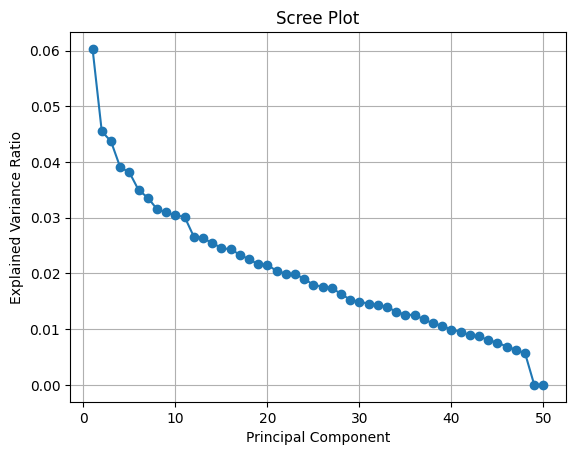

In [16]:
# Generate high-dimensional synthetic data
from sklearn.datasets import make_classification

X_hd, _ = make_classification(n_samples=200, n_features=50, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X_hd)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


##Q37: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 1.0
Recall: 1.0
F1-Score: 1.0


##Q38: Train a PCA model and analyze the effect of different numbers of components on accuracy.

In [18]:
for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_pca))
    print(f"Accuracy with {n} PCA components: {acc}")


Accuracy with 1 PCA components: 0.9
Accuracy with 2 PCA components: 0.9333333333333333
Accuracy with 3 PCA components: 1.0
Accuracy with 4 PCA components: 1.0


##Q39: Train a KNN Classifier with different **leaf_size** values and compare accuracy.

In [19]:
for leaf in [10, 20, 30, 40, 50]:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"Leaf size {leaf}, Accuracy: {acc}")


Leaf size 10, Accuracy: 1.0
Leaf size 20, Accuracy: 1.0
Leaf size 30, Accuracy: 1.0
Leaf size 40, Accuracy: 1.0
Leaf size 50, Accuracy: 1.0


##Q40: Train a PCA model and visualize how data points are transformed before and after PCA.

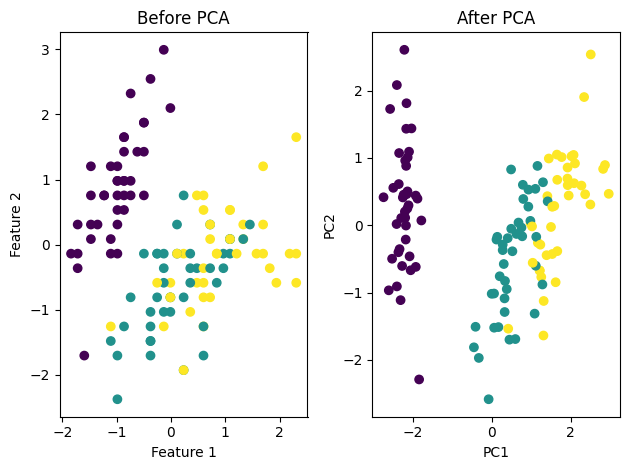

In [20]:
# Before PCA (first 2 features)
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis')
plt.title('Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# After PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title('After PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


##Q41: Train a KNN Classifier on a dataset with noise and evaluate robustness.

In [21]:
from sklearn.datasets import make_classification

# Create dataset with noise
X_noise, y_noise = make_classification(n_samples=200, n_features=4, n_informative=2, n_redundant=0, flip_y=0.2, random_state=42)

# Split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noise, y_noise, test_size=0.2, random_state=42)

# Scale
X_train_n = scaler.fit_transform(X_train_n)
X_test_n = scaler.transform(X_test_n)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_n, y_train_n)
acc = accuracy_score(y_test_n, knn.predict(X_test_n))

print("Accuracy on Noisy Dataset:", acc)


Accuracy on Noisy Dataset: 0.725


##Q42: Apply PCA on an image dataset (digits) and visualize compressed images.

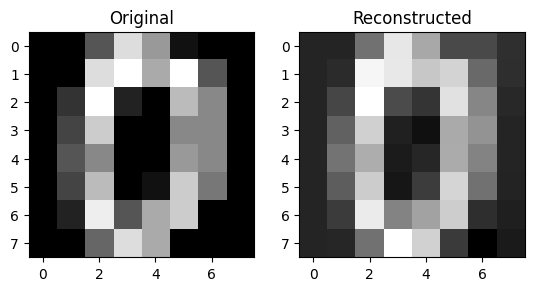

In [22]:
from sklearn.datasets import load_digits

# Load image dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Apply PCA
pca = PCA(n_components=20)
X_pca_digits = pca.fit_transform(X_digits)
X_reconstructed = pca.inverse_transform(X_pca_digits)

# Visualize original and reconstructed
fig, axes = plt.subplots(1, 2)
axes[0].imshow(X_digits[0].reshape(8, 8), cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(X_reconstructed[0].reshape(8, 8), cmap='gray')
axes[1].set_title("Reconstructed")
plt.show()


##Q43: Compare training time of KNN Classifier using different algorithms (auto, ball_tree, kd_tree, brute).


In [23]:
import time

algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    end = time.time()
    print(f"Algorithm: {algo}, Training Time: {end - start:.5f} seconds")


Algorithm: auto, Training Time: 0.00159 seconds
Algorithm: ball_tree, Training Time: 0.00129 seconds
Algorithm: kd_tree, Training Time: 0.00120 seconds
Algorithm: brute, Training Time: 0.00080 seconds


##Q44: Train a KNN Classifier on an imbalanced dataset and evaluate performance using confusion matrix.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, n_features=4, random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imb, y_train_imb)
y_pred_imb = knn.predict(X_test_imb)

# Confusion Matrix
cm = confusion_matrix(y_test_imb, y_pred_imb)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[174   0]
 [  9  17]]


##Q45: Train a PCA model and determine the optimal number of components for 95% variance.

In [25]:
pca = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Components for 95% Variance:", n_components_95)


Components for 95% Variance: 2


##Q46: Train a KNN Classifier with different distance metrics (Euclidean, Manhattan) and compare performance.

In [26]:
metrics = ['euclidean', 'manhattan']

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"Accuracy with {metric} distance: {acc}")


Accuracy with euclidean distance: 1.0
Accuracy with manhattan distance: 1.0


##Q47: Apply PCA followed by KNN Classification and visualize decision boundary.

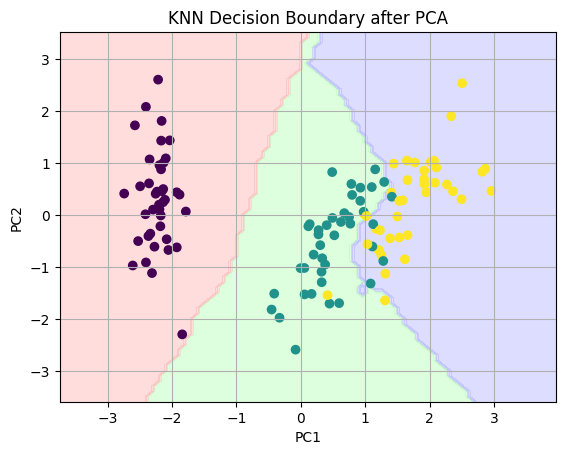

In [27]:
from matplotlib.colors import ListedColormap

# PCA to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Plot decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("KNN Decision Boundary after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


##Q48: Train a PCA model and print eigenvalues and eigenvectors.

In [28]:
pca = PCA()
pca.fit(X_train_scaled)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors (first 2):\n", eigenvectors[:2])


Eigenvalues:
 [2.92644395 0.92776828 0.15976229 0.01963892]
Eigenvectors (first 2):
 [[ 0.5174275  -0.27120139  0.58228005  0.56539237]
 [ 0.39110948  0.91812675  0.02180681  0.06000927]]
